In [175]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

import fastpli.model.solver
import fastpli.model.sandbox as sandbox

In [176]:

def set_3d_axes_equal(ax):
    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    plot_radius = 0.5 * max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])
    
def plot_fiber_bundles(fbs, colors,ax):
    #fig = plt.figure()
    #ax = fig.add_subplot(1, 2, 1, projection='3d')
    for fb, c in zip(fbs, colors):
        for f in fb:
            ax.plot(f[:,0],f[:,1],f[:,2], c)
    set_3d_axes_equal(ax)

Straight Fiber Object

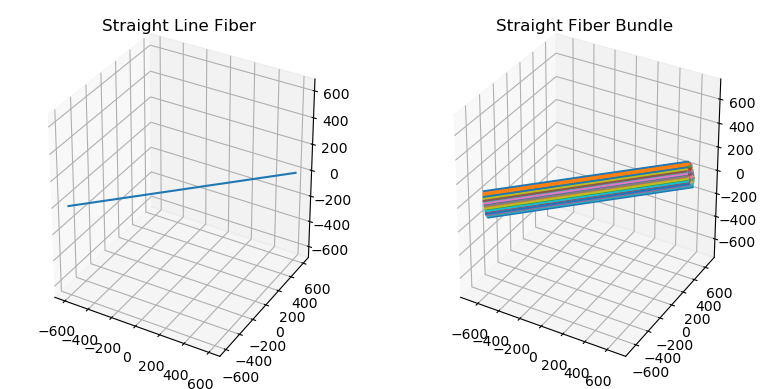

In [177]:
#fb_str = np.array([[-100, -100, 0], [-50, -50, 0], [0,0,0], [50, 50,0], [100, 100, 0]])
fb_str = np.array([[-600, -600, 0], [-300, -300, 0], [0,0,0], [300, 300,0], [600, 600, 0]])
#population = fastpli.model.sandbox.seeds.triangular_circle(20, 6)
#fiber_radii = np.random.uniform(2.0, 10.0, population.shape[0])

population = fastpli.model.sandbox.seeds.triangular_circle(100, 20)
fiber_radii = np.random.uniform(2.0, 2.0, population.shape[0])

fiber_bundle = fastpli.model.sandbox.build.bundle(fb_str,population, fiber_radii)

fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot(fb_str[:, 0],fb_str[:, 1],fb_str[:, 2])
plt.title("Straight Line Fiber")
set_3d_axes_equal(ax)

ax = fig.add_subplot(1, 2, 2, projection='3d')
for fiber in fiber_bundle:
    ax.plot(fiber[:, 0], fiber[:, 1], fiber[:, 2])
plt.title("Straight Fiber Bundle")
set_3d_axes_equal(ax)
plt.show()

Curved Fiber Bundle

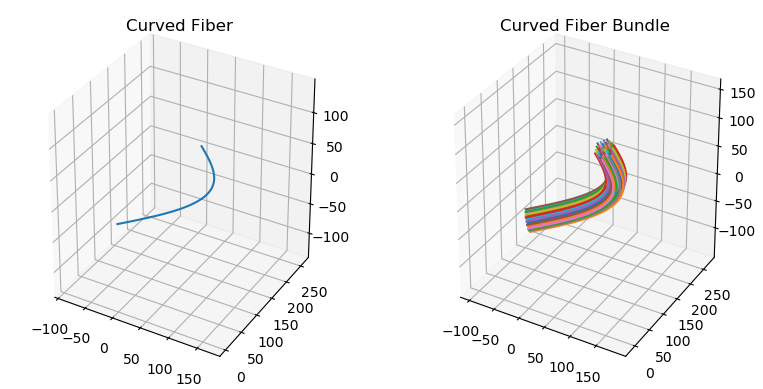

In [178]:
t = np.linspace(0, np.pi, 50, True)
curv_fb = np.array((t[5] + 82 * np.sin(t), t[22] + 82 * t, t[45] + 6 * np.sin(t))).T

radius = 21
seeds = sandbox.seeds.triangular_circle(20,6,center=(0,0),radii=0.1)
curv_fiber_bundle = fastpli.model.sandbox.build.bundle(curv_fb,seeds, radius/10)

fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot(curv_fb[:, 0],curv_fb[:, 1],curv_fb[:, 2])
plt.title("Curved Fiber")
set_3d_axes_equal(ax)

ax = fig.add_subplot(1, 2, 2, projection='3d')
for fiber in curv_fiber_bundle:
    ax.plot(fiber[:, 0], fiber[:, 1], fiber[:, 2])
plt.title("Curved Fiber Bundle")
set_3d_axes_equal(ax)
plt.show()

Crossing Fiber

97


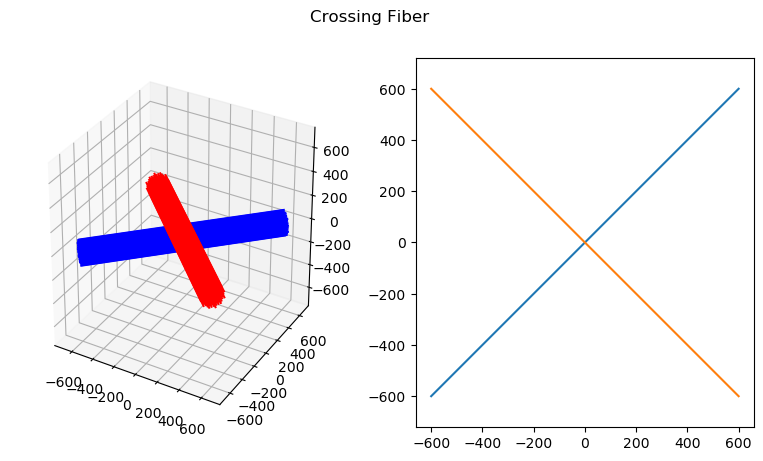

In [179]:
#Crossing Fibers
fb_0 = np.array([[-600, -600, 0], [-300, -300, 0], [0,0,0], [300, 300,0], [600, 600, 0]])
fb_1 = np.array([[-600, 600, 0], [-300, 300, 0], [0,0,0], [300, -300,0], [600, -600, 0]])

population = fastpli.model.sandbox.seeds.triangular_circle(100, 19)
fiber_radii = np.random.uniform(2.0, 2.0, population.shape[0])
fiber_bundle_x = fastpli.model.sandbox.build.bundle(fb_0,population, fiber_radii)
fiber_bundle_y = fastpli.model.sandbox.build.bundle(fb_1,population, fiber_radii)

fiber_bundles = [fiber_bundle_x, fiber_bundle_y]
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
plot_fiber_bundles(fiber_bundles, ['b', 'r'],ax)

ax = fig.add_subplot(1, 2, 2)
#fig, ax = plt.subplots(1,1)
ax.plot(fb_0[:,0], fb_0[:,1])
ax.plot(fb_1[:,0], fb_1[:,1])
ax.axis('equal')
fig.suptitle('Crossing Fiber')
plt.show()

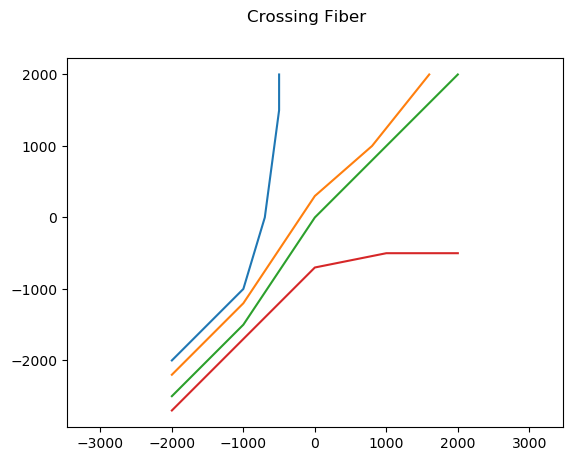

In [180]:
#Splaying fibers
fb_0 = np.array([[-2000, -2000, 0], [-1000, -1000, 0], [-700,0,0], [-500, 1500,0], [-500, 2000, 0]])
fb_1 = np.array([[-2000, -2200, 0], [-1000, -1200, 0], [0,300,0], [800, 1000,0], [1600, 2000, 0]])
fb_2 = np.array([[-2000, -2500, 0], [-1000, -1500, 0], [0,0,0], [1000, 1000,0], [2000, 2000, 0]])
fb_3 = np.array([[-2000, -2700, 0], [-1000, -1700, 0], [0,-700,0], [1000, -500,0], [2000, -500, 0]])

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
#fig, ax = plt.subplots(1,1)
ax.plot(fb_0[:,0], fb_0[:,1])
ax.plot(fb_1[:,0], fb_1[:,1])
ax.plot(fb_2[:,0], fb_2[:,1])
ax.plot(fb_3[:,0], fb_3[:,1])
ax.axis('equal')
fig.suptitle('Crossing Fiber')
plt.show()